In [1]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

In [2]:
def load_data(img_path, number_of_data=700):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 610 입니다.
x_train shape: (700, 28, 28, 3)
y_train shape: (700,)


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 610 입니다.
x_train shape: (700, 28, 28, 3)
y_train shape: (700,)


라벨:  0


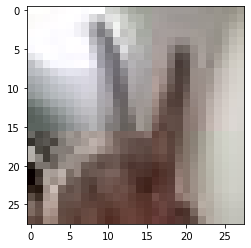

In [5]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [6]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(100,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        28832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
22/22 [==============================] - 6s 106ms/step - loss: 1.1006 - accuracy: 0.3771
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.0544 - accuracy: 0.5625
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 0.8829 - accuracy: 0.6503
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.6673
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.8067
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8304
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8922
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.9111
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8760
Epoch 10/15
22/22 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9075
Epoch 11/15
22/22

In [8]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (700, 28, 28, 3)
y_train shape: (700,)


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

22/22 - 0s - loss: 1.1965 - accuracy: 0.7014
test_loss: 1.196536898612976 
test_accuracy: 0.7014285922050476


기존 데이터만으로 학습했을 때 기준 미달의 정확도를 보였음, 이후 model.add(keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,3)))의 model.add(keras.layers.Conv2D(64,(3,3)의 첫번째 인자를 100으로 올렸음에도 정확도 상승이 충분치 않았고, 구글드라이브에서 다른 사람의 데이터를 추가하여 데이터의 개수와 종류를 늘려준 결과 60% 이상의 정확도를 보일 수 있었음.
높은 loss 값이 나온 이유에 대해선 보충이 필요.